# Shibum Market Analysis

시범 21동 10층 3호
- 면적: 118 sqm


## Seoul apartments & SP500 trend analysis

### Historical movement of average apartment price in Seoul in comparison with SP500

> While both the DJIA and S&P 500 are used by investors to determine the general trend of the U.S. stock market, the S&P 500 is more encompassing, as it is based on a larger sample of total U.S. stocks. *[investopedia](https://www.investopedia.com/ask/answers/difference-between-dow-jones-industrial-average-and-sp-500/)*

### Currency adjusted analysis (CAD/USD)


### Data source

- [R-ONE 부동산통계뷰어: 매매가격지수(아파트)](https://www.reb.or.kr/r-one/statistics/statisticsViewer.do?menuId=HOUSE_21211)
- [국토교통부 실거래가 공개시스템](http://rtdown.molit.go.kr/)
- Yahoo Finance

In [221]:
# Get SP500 from 2003-11-01 upto today (monthly average)
import yfinance as yf

sp500 = yf.download('^GSPC', start='2003-11-01', parse_dates=['Date'], index_col='Date')
sp500 = sp500.Close.to_frame()
sp500.rename(columns={"Close": "sp500"}, inplace=True)
sp500 = sp500.sp500.resample('M').mean()
sp500

[*********************100%***********************]  1 of 1 completed


Date
2003-11-30    1049.898945
2003-12-31    1080.635920
2004-01-31    1132.517499
2004-02-29    1143.356323
2004-03-31    1123.978245
                 ...     
2022-06-30    3898.946684
2022-07-31    3911.729492
2022-08-31    4158.563084
2022-09-30    3850.520496
2022-10-31    3678.645312
Freq: M, Name: sp500, Length: 228, dtype: float64

In [222]:
import pandas


df = pandas.read_csv('./data/seoul_apt_price_index_200311_202209.csv', index_col=[0], parse_dates=[0])
# convert beginning of the month to the end of the month
df.index = df.index.to_period('M').to_timestamp('M')
df.tail()

,seoul,mapogu,yangchungu,youngdeungpogu,seochogu,gangnamgu,songpagu
date,,,,,,,
2022-05-31,104.201,104.367,102.602,103.484,106.197,106.102,105.526
2022-06-30,104.118,104.272,102.542,103.443,106.297,106.112,105.442
2022-07-31,103.885,103.894,102.464,103.348,106.378,106.068,105.282
2022-08-31,103.415,103.146,102.208,102.959,106.300,105.887,104.822
2022-09-30,102.636,102.260,101.677,102.381,106.074,105.436,103.789


In [223]:
df["sp500"] = sp500
df.head()

,seoul,mapogu,yangchungu,youngdeungpogu,seochogu,gangnamgu,songpagu,sp500
date,,,,,,,,
2003-11-30,52.489,50.588,53.803,49.743,50.469,53.718,54.574,1049.898945
2003-12-31,52.092,50.120,53.400,49.499,49.659,52.993,53.763,1080.635920
2004-01-31,51.936,50.069,53.146,49.319,49.209,52.817,53.462,1132.517499
2004-02-29,52.246,50.238,53.051,49.313,49.690,53.740,54.451,1143.356323
2004-03-31,52.519,50.388,53.219,49.547,50.042,54.093,55.125,1123.978245


In [224]:
# Normalize to the starting row as the base
df = df.div(df.iloc[0])
df.head()

,seoul,mapogu,yangchungu,youngdeungpogu,seochogu,gangnamgu,songpagu,sp500
date,,,,,,,,
2003-11-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2003-12-31,0.992437,0.990749,0.992510,0.995095,0.983951,0.986504,0.985139,1.029276
2004-01-31,0.989464,0.989741,0.987789,0.991476,0.975034,0.983227,0.979624,1.078692
2004-02-29,0.995370,0.993081,0.986023,0.991356,0.984565,1.000410,0.997746,1.089016
2004-03-31,1.000572,0.996046,0.989146,0.996060,0.991539,1.006981,1.010096,1.070559


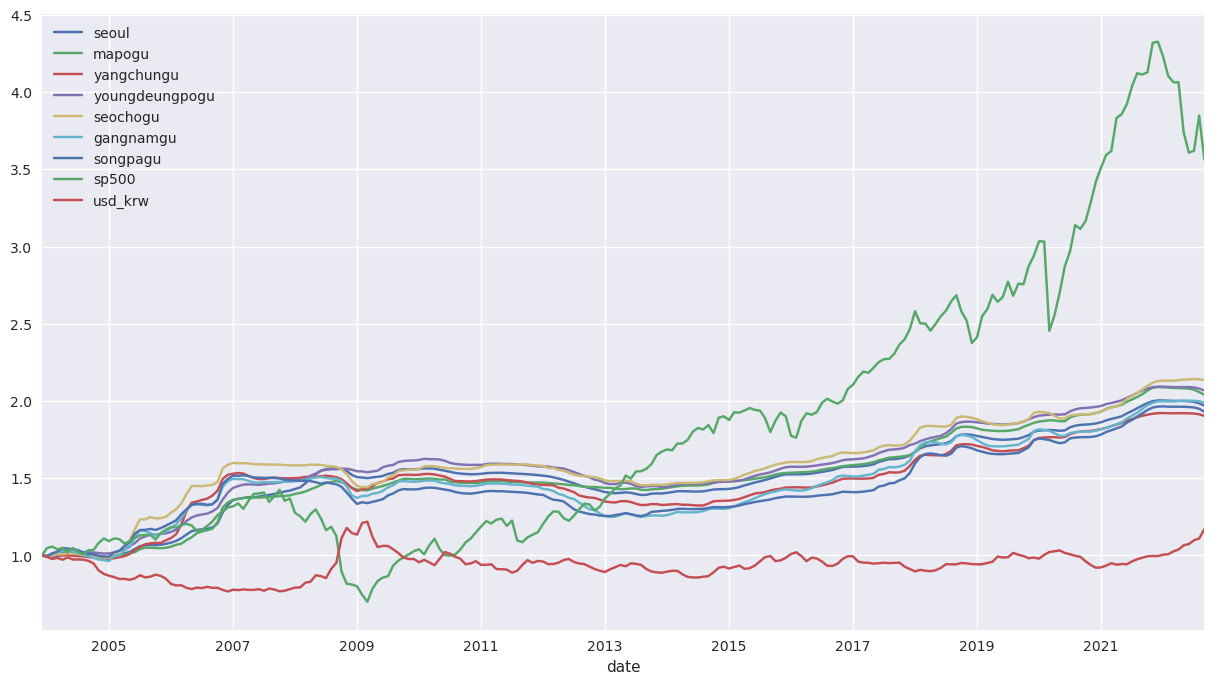

In [239]:

import matplotlib.pyplot as plt

plt.style.use('seaborn')
df.plot(figsize=(15,8))
plt.show()

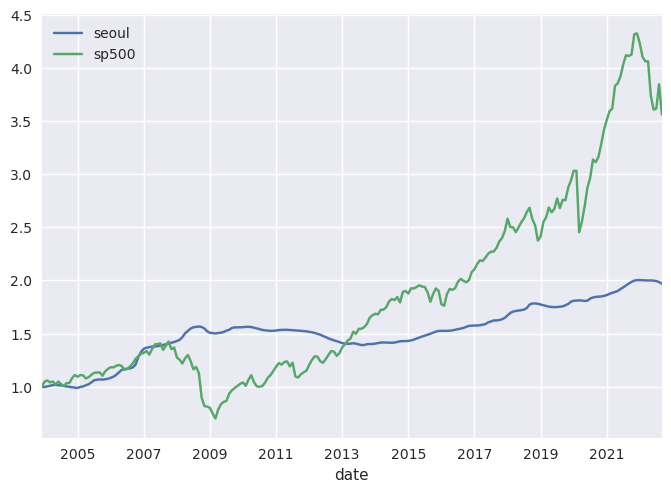

In [242]:
df[["seoul","sp500"]].plot()
_ = plt.show()

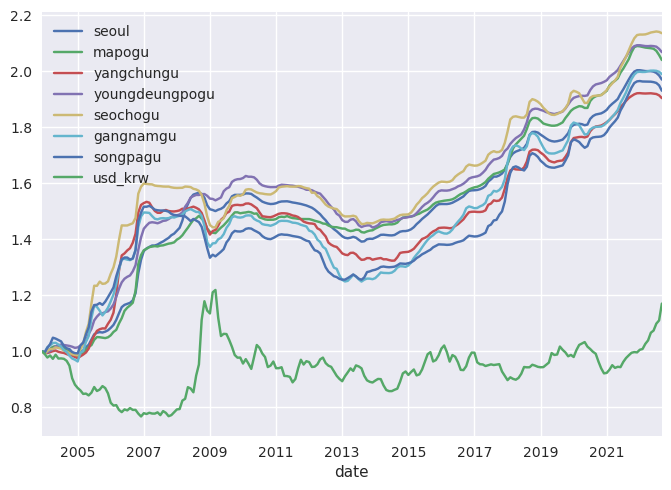

In [243]:

# Almost all regions seem to move in parallel 
# with exception of gangnam and songpa being highly volatile -> speculative demand

df.drop(columns='sp500').plot()
plt.show()

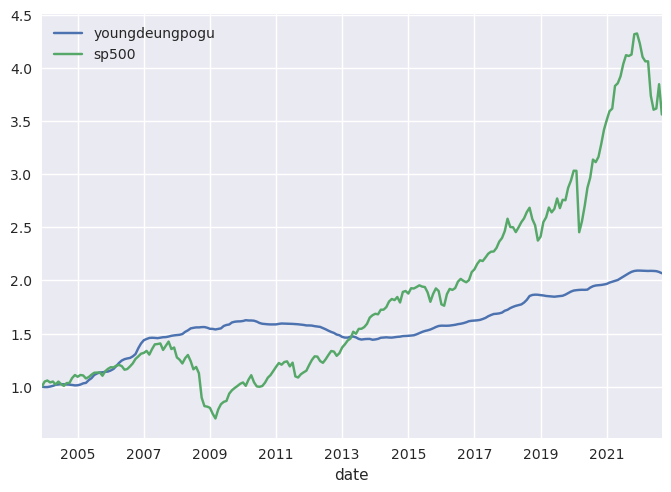

In [244]:

df[["youngdeungpogu", 'sp500']].plot()
plt.show()

In [245]:
usd_krw = yf.download('USDKRW=X', start='2003-11-01', parse_dates=['Date'], index_col='Date').Close.to_frame()
usd_krw = usd_krw.resample('M').mean()

[*********************100%***********************]  1 of 1 completed


In [246]:
df["usd_krw"] = usd_krw
df.dropna(inplace=True)
df = df.div(df.iloc[0])
df.tail()

,seoul,mapogu,yangchungu,youngdeungpogu,seochogu,gangnamgu,songpagu,sp500,usd_krw
date,,,,,,,,,
2022-05-31,2.000326,2.082342,1.921386,2.090628,2.138525,2.002189,1.962800,3.738873,1.065973
2022-06-30,1.998733,2.080447,1.920262,2.089800,2.140538,2.002378,1.961237,3.608011,1.073834
2022-07-31,1.994260,2.072905,1.918801,2.087881,2.142170,2.001547,1.958261,3.619840,1.098601
2022-08-31,1.985238,2.057981,1.914007,2.080022,2.140599,1.998132,1.949705,3.848255,1.110050
2022-09-30,1.970283,2.040303,1.904064,2.068345,2.136048,1.989621,1.930491,3.563199,1.170114


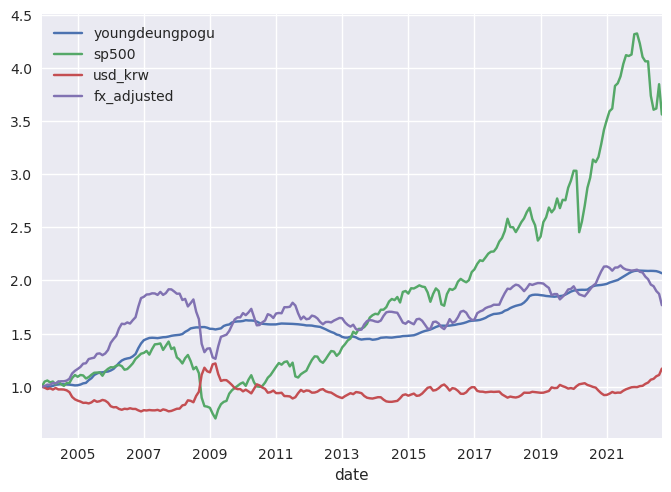

In [247]:

adjusted = df.copy()[["youngdeungpogu", "sp500", "usd_krw"]]
adjusted["fx_adjusted"] = adjusted["youngdeungpogu"].div(adjusted["usd_krw"])
adjusted.plot()
plt.show()

### FX-adjusted price movement vs SP500
- Both graphs seem to move in the parallel motion.
- SP500 seem to do more than 2X better during the bull cycle.


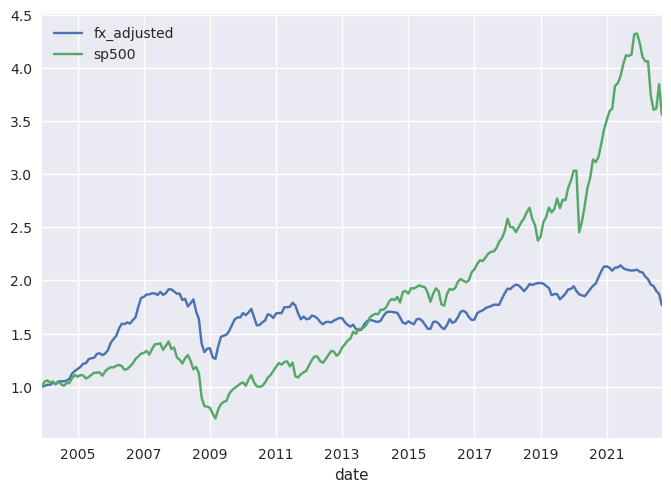

In [248]:
adj = adjusted[["fx_adjusted", "sp500"]]
adj.plot()
plt.show()

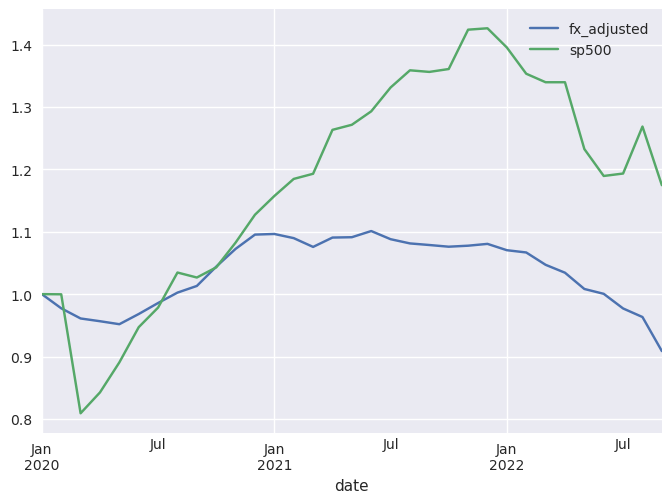

In [249]:
adj["2020":].div(adj.loc["2020-01-31"]).plot()
plt.show()

## Seoul apartments & Shibum correlation in price movements

- Shibum 118.12sqm have moved in parallel with rest of the Seoul until Q3 of 2019, then popped.
- Prices are more volatile due to smaller sample size
- FX-adjust price dips seems to be lagging 1-3 months compared to SP500

In [234]:
import pandas as pd

shibum_prices = pd.read_csv('./data/shibum_prices.csv', parse_dates=["date"], index_col="date")[["m2", "price", "floor"]]
# Filter only the size same as 21dong
shibum_prices = shibum_prices[shibum_prices.m2 == 118.12]

# Ignore floor
shibum_prices = shibum_prices["price"]

# Collapse rows into monthly average
shibum_prices = shibum_prices.resample('M').mean()

# Forward fill NA values
shibum_prices = shibum_prices.fillna(method='ffill')

shibum_prices

date
2006-01-31    8.200000e+08
2006-02-28    8.200000e+08
2006-03-31    8.583333e+08
2006-04-30    8.900000e+08
2006-05-31    8.900000e+08
                  ...     
2021-02-28    2.200000e+09
2021-03-31    2.200000e+09
2021-04-30    2.463333e+09
2021-05-31    2.463333e+09
2021-06-30    2.470000e+09
Freq: M, Name: price, Length: 186, dtype: float64

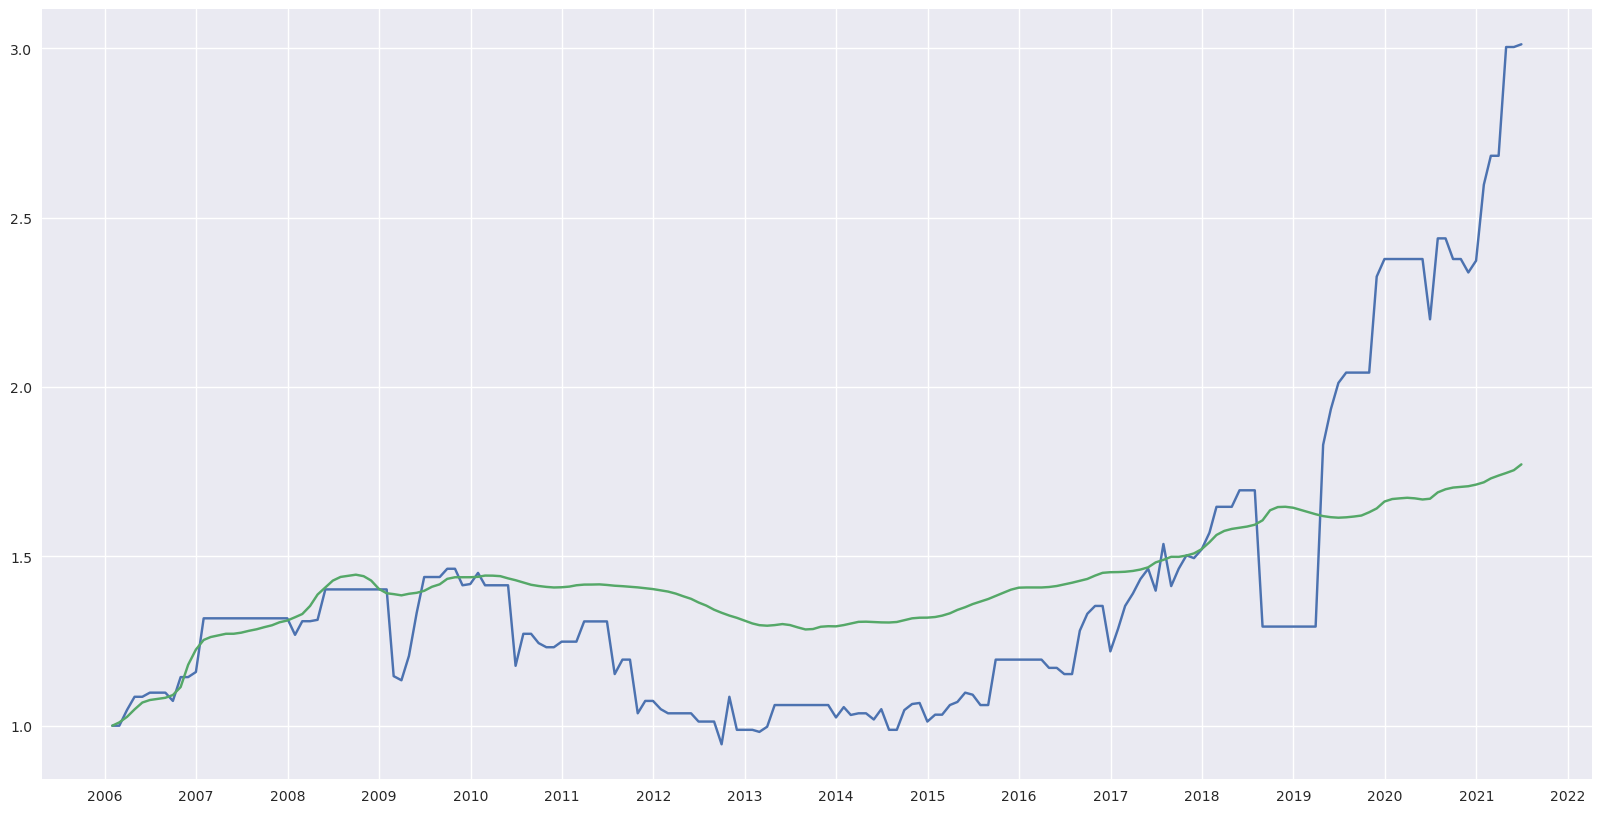

In [262]:
import matplotlib.dates as mdates

ss = shibum_prices.to_frame()
ss["seoul"] = df["seoul"]
ss = ss.div(ss.iloc[0])

fig, ax = plt.subplots(1, 1)
ax.plot(ss)
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.show()

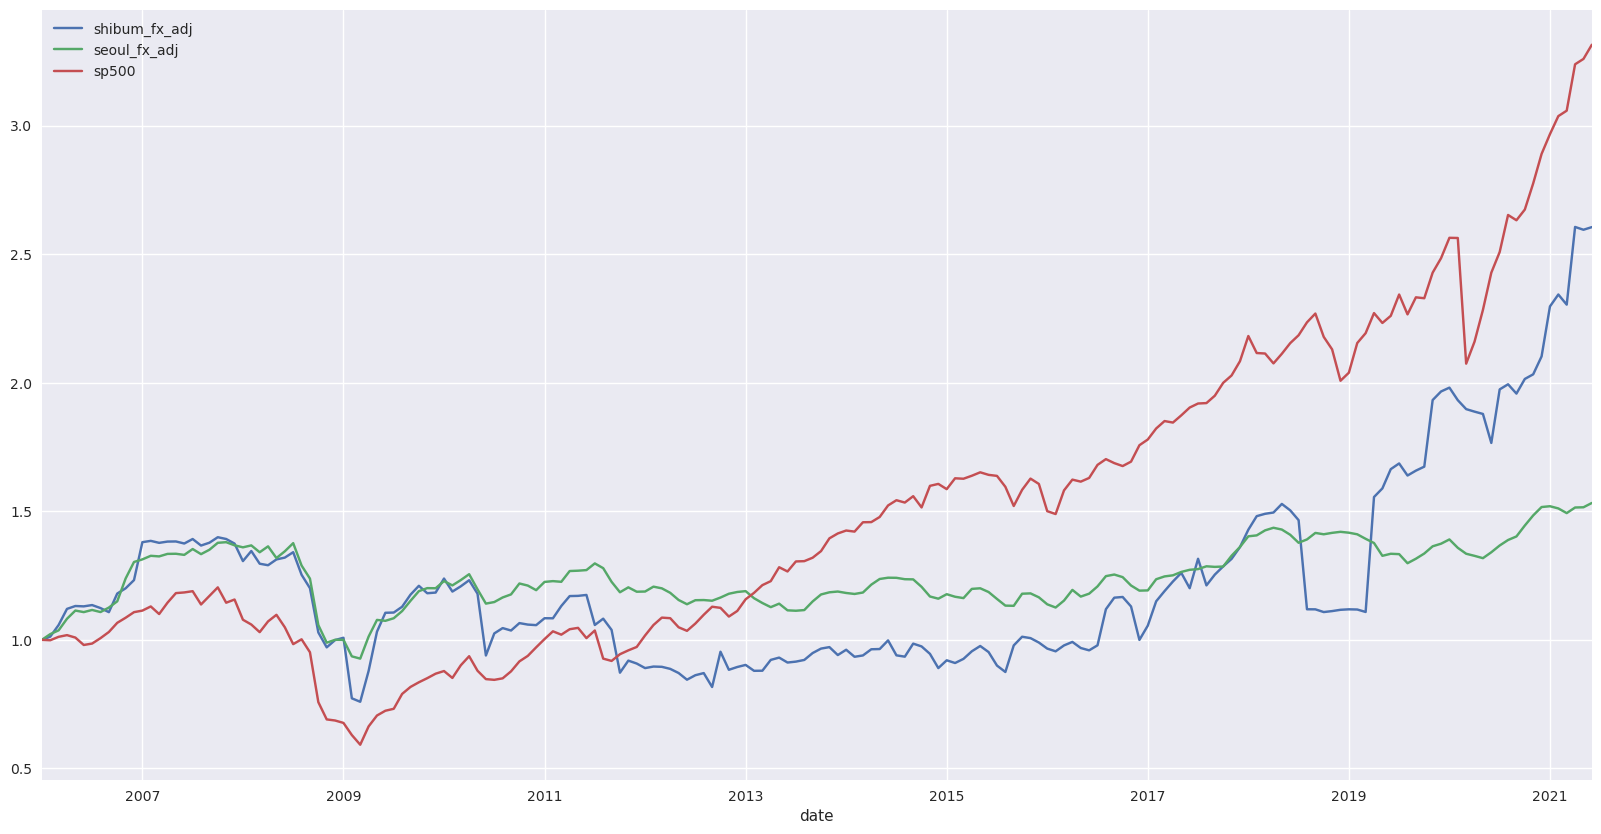

In [284]:
ss['usd_krw'] = df['usd_krw']
ss['sp500'] = df['sp500']
ss = ss.div(ss.iloc[0])
ss['shibum_fx_adj'] = ss['price'].div(ss['usd_krw'])
ss['seoul_fx_adj'] = ss['seoul'].div(ss['usd_krw'])

ss[['shibum_fx_adj', 'seoul_fx_adj', 'sp500']].plot()
_ = plt.show()


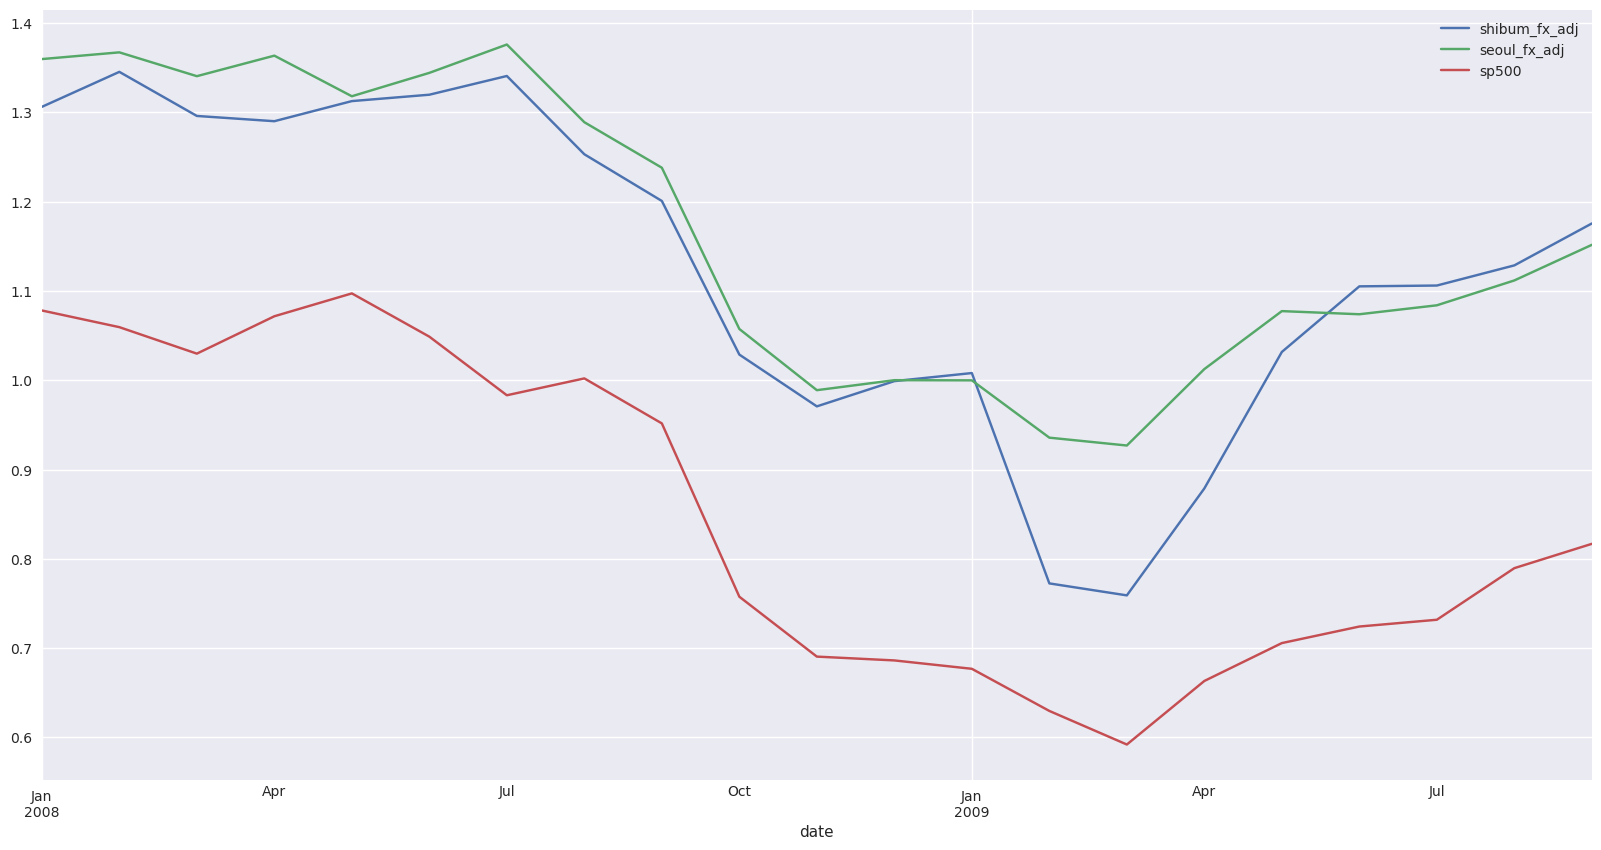

In [293]:
# During 2008 crisis, Shibum was following SP500 dipping 1-3 months behind

ss["2008":"2009-09"][['shibum_fx_adj', 'seoul_fx_adj', 'sp500']].plot()
plt.show()

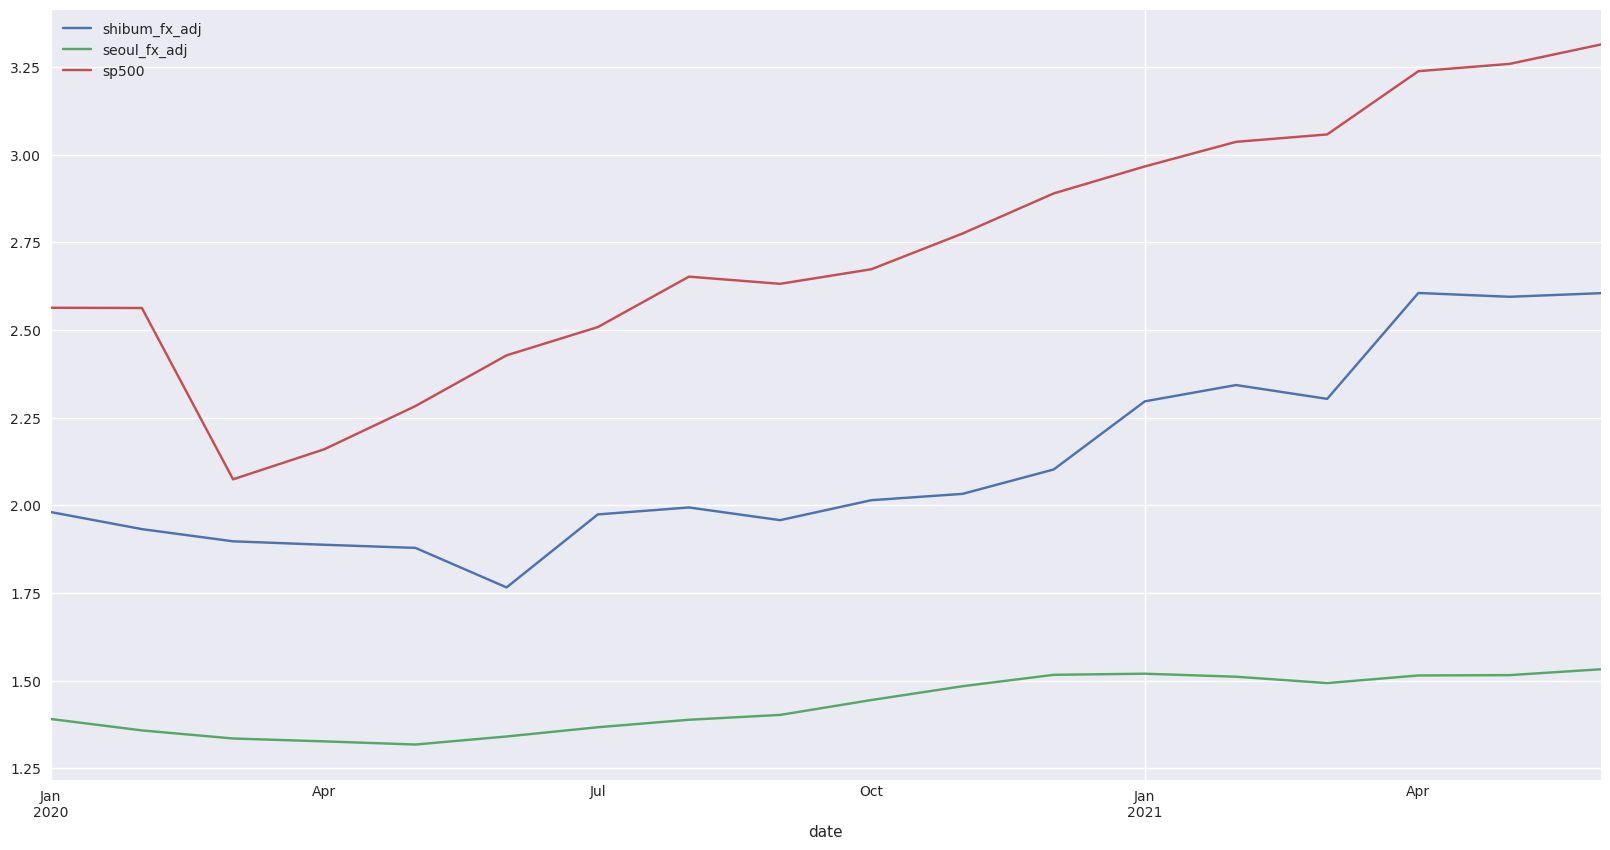

In [292]:
# The lag can be also seen during the beginning of pandemic, 2020.
ss["2020":][['shibum_fx_adj', 'seoul_fx_adj', 'sp500']].plot()
plt.show()

## Seasonality 
- Bottoms out during Summer and picks up toward new year.
- Tend to peak around Jan - Feb then decline toward Summer

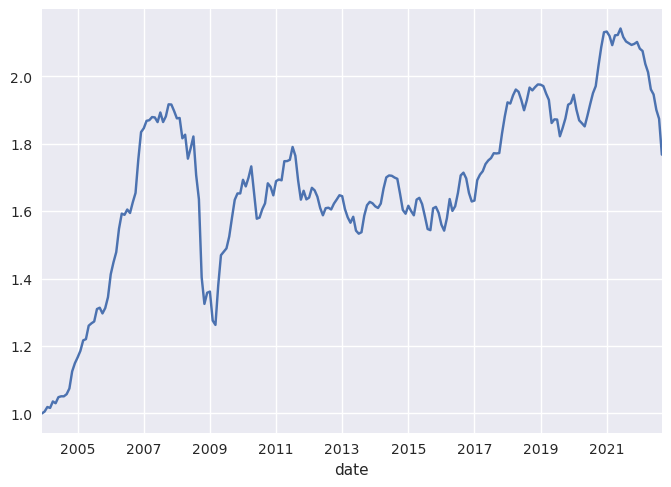

In [250]:
adj["fx_adjusted"].plot()
plt.show()

In [254]:
# Example code to format x-axis label

# from matplotlib import dates as mdates
# years = mdates.YearLocator()    # only print label for the years
# months = mdates.MonthLocator()  # mark months as ticks
# years_fmt = mdates.DateFormatter('%Y-%b')
# fmt = mdates.DateFormatter('%b')

# _, axes = plt.subplots(nrows=3,ncols=1, figsize=(20, 10))
# for i, ax in enumerate(axes):
#     ax = df.iloc[:,i].plot(ax=ax)
#     ax.xaxis.set_major_locator(years)
#     ax.xaxis.set_major_formatter(years_fmt)
#     ax.xaxis.set_minor_locator(months)
#     ax.xaxis.set_minor_formatter(fmt)
#     ax.set_ylabel(df.iloc[:,i].name)
#     plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
#     plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

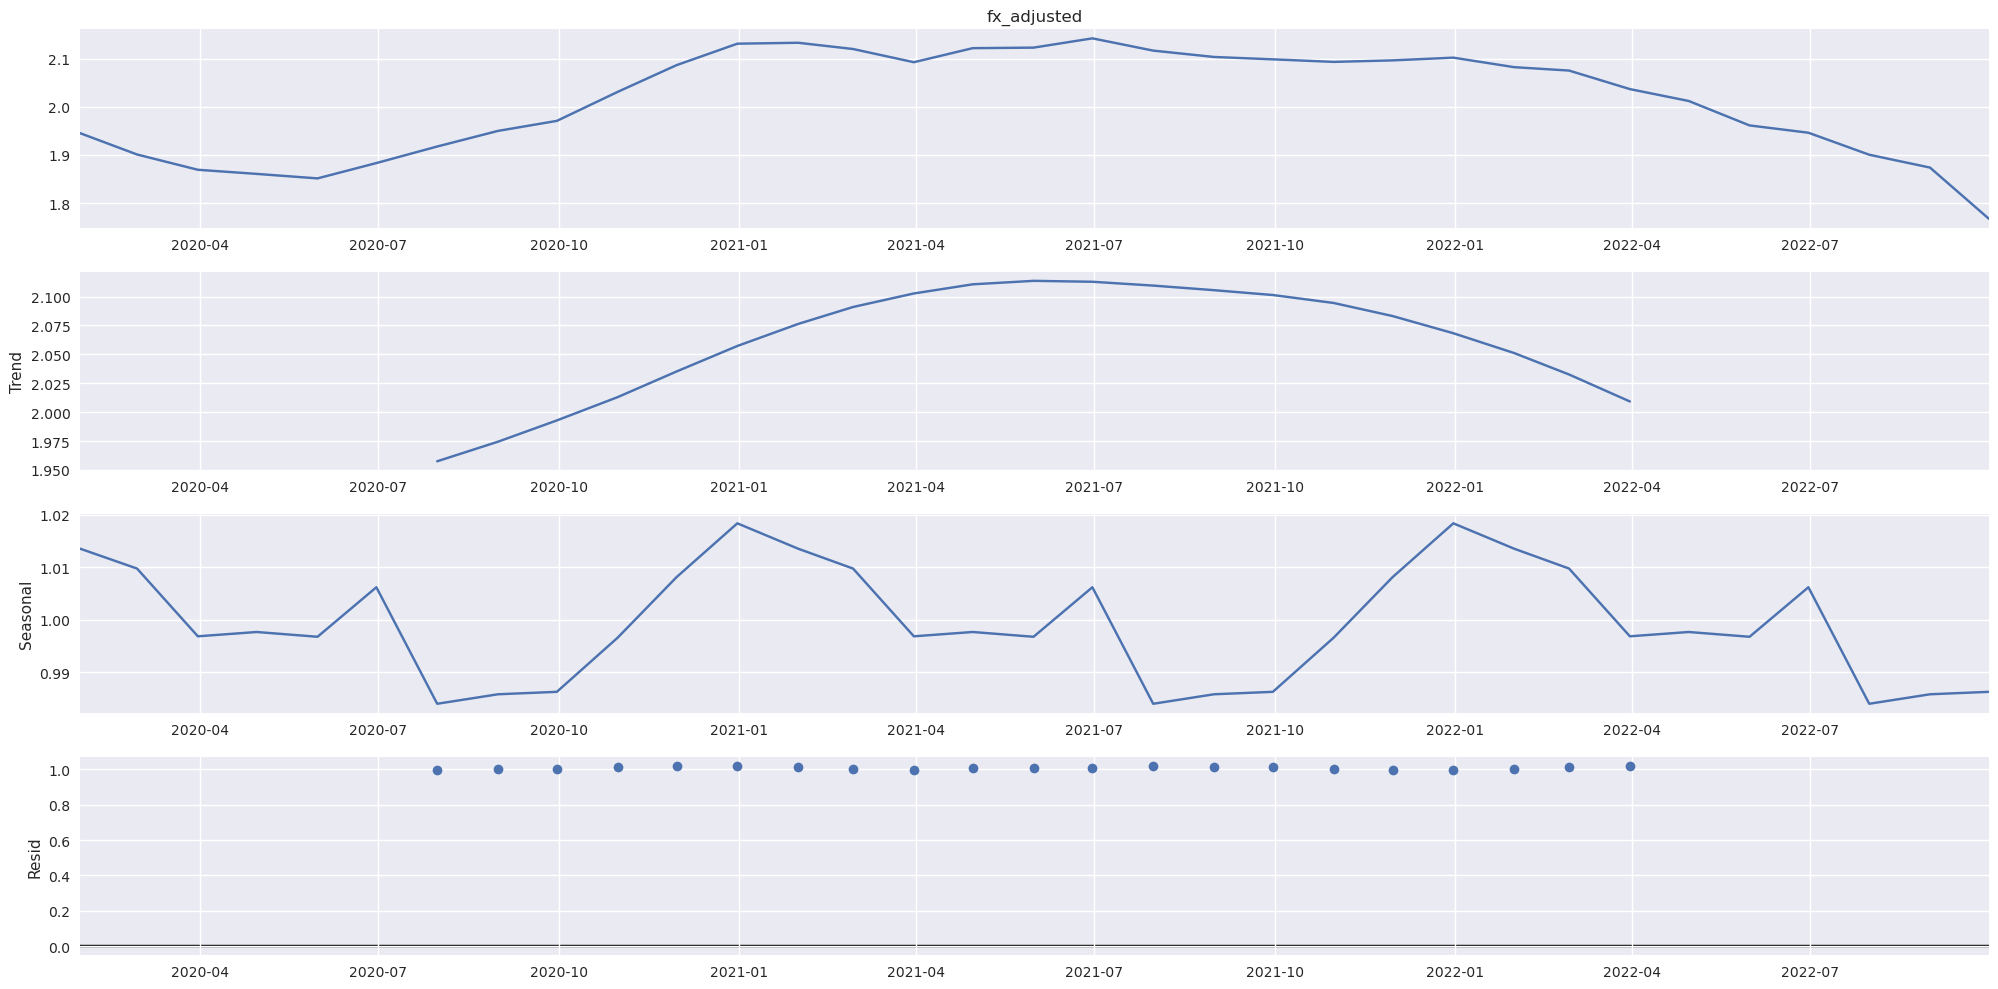

In [252]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose


# reset plt config to default
plt.rcParams['figure.figsize'] = (20, 10)

result = seasonal_decompose(adj["2020":]["fx_adjusted"], model='multiplicative')
ax = result.plot()
_ = plt.show()

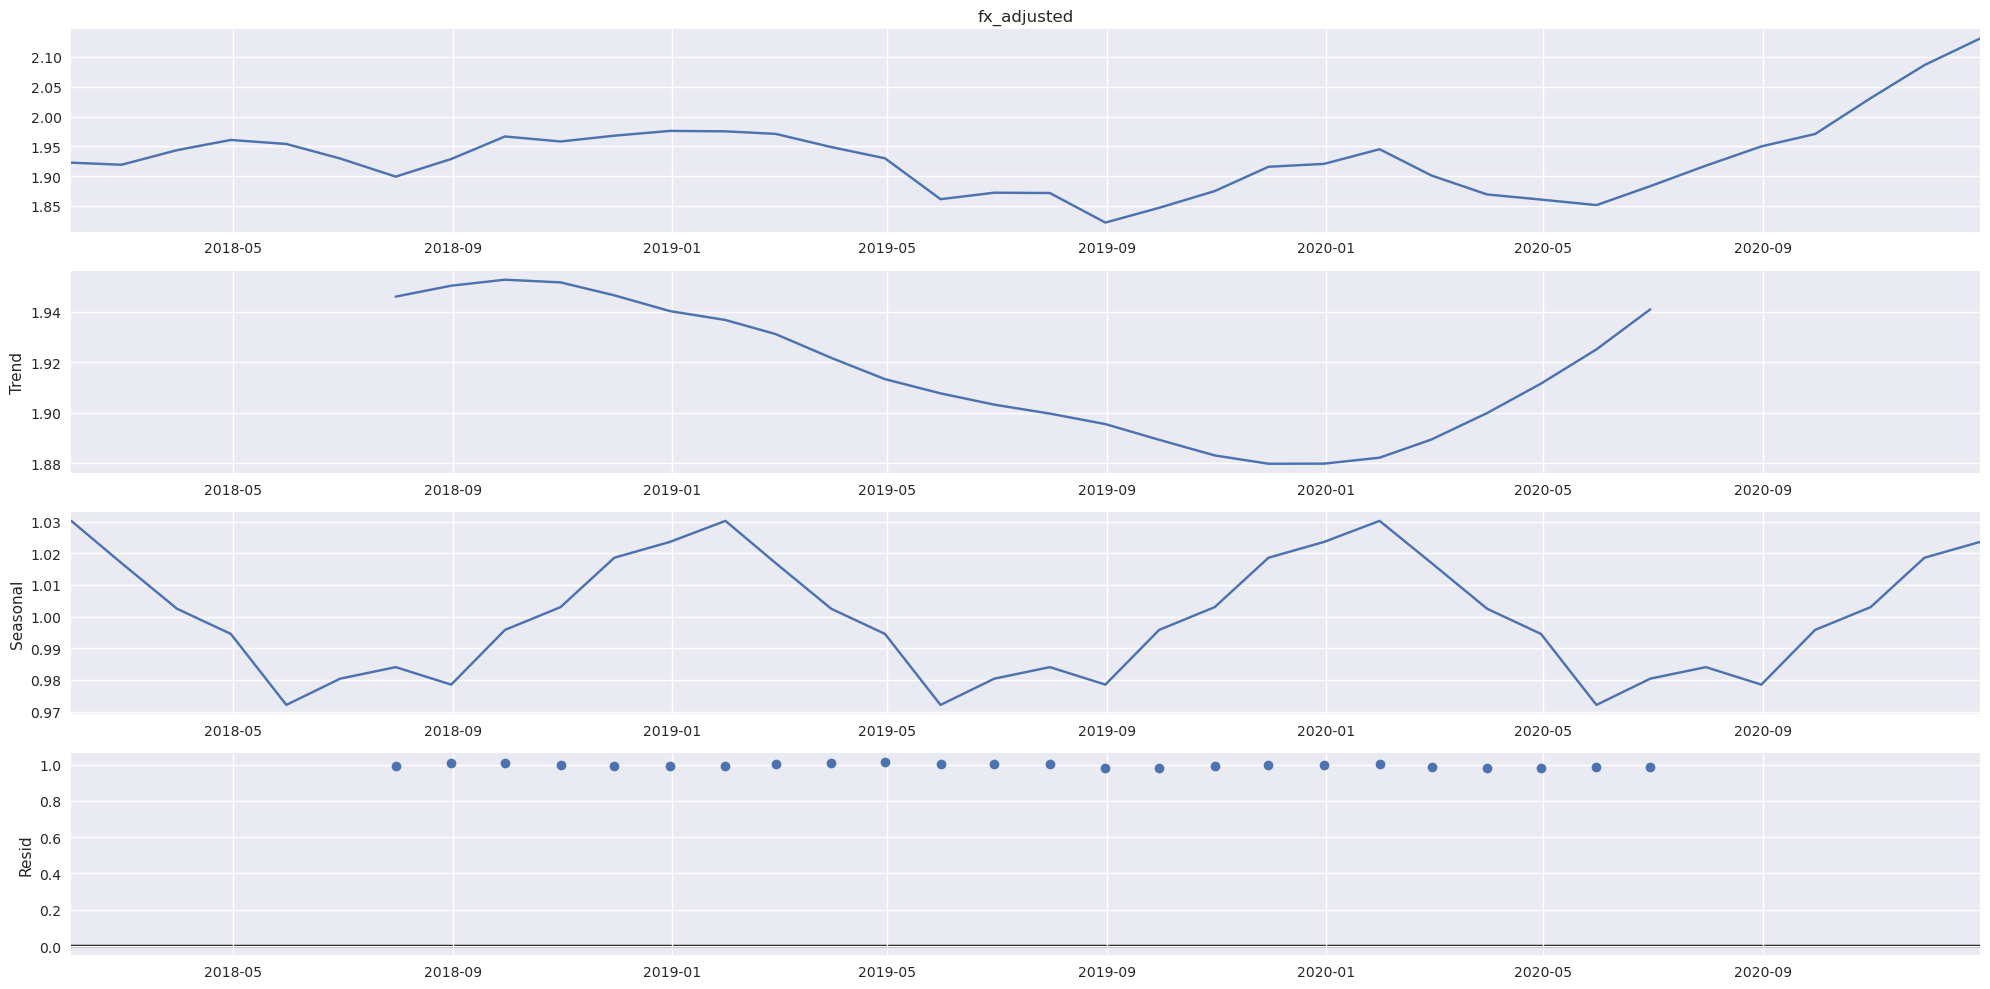

In [253]:
result = seasonal_decompose(adj["2018":"2020"]["fx_adjusted"], model='multiplicative')
ax = result.plot()
_ = plt.show()